In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# unterdrücke die Anzeige exponantieller Schreibweise
np.set_printoptions(suppress=True)

# Baseball

In [2]:
df = pd.read_csv("data/Batting.csv")

In [3]:
df.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [4]:
batting_year_2021 = df[df.yearID == 2021][["G", "AB", "H", "2B", "3B", "HR"]]

In [5]:
batting_year_2021.head()

,G,AB,H,2B,3B,HR
108789,16,0,0,0,0,0
108790,8,3,1,0,0,0
108791,28,0,0,0,0,0
108792,31,0,0,0,0,0
108793,152,566,148,30,2,30


In [6]:
batting_year_2021_np = np.array(batting_year_2021)

batting_year_2021_np.shape

(1706, 6)

In [7]:
np.savetxt("data/batting_hits_2021.txt", batting_year_2021_np)

In [8]:
batting = np.genfromtxt("data/batting_hits_2021.txt", dtype="int32")

In [9]:
batting.shape

(1706, 6)

In [10]:
# Games, AtBats, Basehit, 2nd, 3rd, HR

# Wie viele Hits gab es im Jahr 2021 insgesamt?
# Wir summieren also über die Spalten mit Index 2 bis Ende

np.sum(batting[:, 2:])

53962

In [11]:
# dies ist der äquivalente Aufruf der Methode .sum()

batting[:, 2:].sum() # jemand mit einem "funktionalen" Mindset würde aber obigen Stil präferieren

53962

In [12]:
# Wie viele Hits hatte ein Spieler in der Saison 2021 durchschnittlich?

np.mean(batting[:, 2:])

7.90767878077374

In [13]:
# Das scheinen sehr wenige Hits für eine ganze Saison zu sein.
# Was sagt uns die Standardabweichung?

np.std(batting[:, 2:])

23.314267645684566

In [14]:
# Besser ist wohl, wir sehen uns erst einmal den stabileren Median an

np.median(batting[:, 2:])

0.0

In [15]:
# Ohje! Ein deutliches Zeichen, dass wir die Personen aussortieren sollten, die gar keine Hits geschlagen haben.

batting_cleaned = batting[np.apply_along_axis(lambda x: np.any(x), 1, batting[:, 2:])]

print(batting_cleaned[:10, :]) # Anzeige der ersten 10 Einträge

print(batting_cleaned.shape)

[[  8   3   1   0   0   0]
 [152 566 148  30   2  30]
 [ 82 297  84  19   1  24]
 [ 41 132  26   6   1   5]
 [ 99 365 104  26   0  20]
 [ 22  36   6   1   0   0]
 [ 12  28   3   2   0   0]
 [ 35  71  19   6   1   2]
 [ 35 130  32   5   2   4]
 [109 182  45   9   2   5]]
(857, 6)


In [16]:
# Das sieht schon besser aus!
# Schauen wir uns also noch einmal sum, mean, median und standard deviation an
print(np.mean(batting_cleaned[:, 2:]))

print(np.median(batting_cleaned[:, 2:]))

print(np.std(batting_cleaned[:, 2:]))

15.741540256709452
3.0
30.963189104826743


(857,)


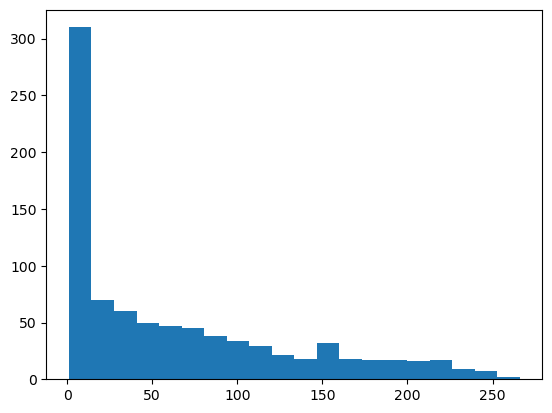

In [17]:
# schauen wir uns doch mal in einem Histogramm an, wie sich die Summen verteilen

sum_hits = np.apply_along_axis(lambda x: np.sum(x), 1, batting_cleaned[:, 2:])

print(sum_hits.shape)

plt.hist(sum_hits, bins=20)
plt.show()

In [18]:
# wie sieht es noch aus, wenn wir die Spieler herausnehmen, die weniger als 6 Hits hatten

hits, counts = np.unique(sum_hits, return_counts=True)

print(dict(zip(hits, counts)))

{1: 81, 2: 48, 3: 31, 4: 28, 5: 23, 6: 17, 7: 15, 8: 14, 9: 13, 10: 9, 11: 7, 12: 8, 13: 14, 14: 2, 15: 9, 16: 7, 17: 3, 18: 10, 19: 7, 20: 5, 21: 6, 22: 5, 23: 2, 24: 6, 25: 3, 26: 4, 27: 3, 28: 5, 29: 7, 30: 4, 31: 4, 32: 7, 33: 2, 34: 1, 35: 6, 36: 7, 37: 1, 38: 4, 39: 6, 40: 6, 41: 6, 42: 4, 43: 8, 44: 2, 45: 2, 46: 3, 47: 2, 48: 5, 49: 2, 50: 6, 51: 3, 52: 4, 53: 3, 54: 1, 55: 6, 56: 6, 57: 3, 58: 3, 59: 7, 61: 7, 62: 1, 63: 2, 64: 3, 65: 4, 66: 2, 67: 2, 68: 7, 69: 3, 70: 2, 71: 4, 73: 6, 74: 5, 75: 4, 76: 2, 77: 5, 78: 3, 79: 1, 80: 3, 81: 4, 82: 3, 83: 3, 84: 5, 85: 3, 86: 3, 87: 4, 88: 2, 89: 2, 90: 3, 91: 2, 92: 3, 93: 1, 94: 4, 95: 3, 96: 4, 97: 3, 98: 2, 99: 2, 100: 3, 101: 5, 102: 1, 103: 3, 104: 2, 105: 1, 106: 1, 107: 2, 108: 1, 109: 1, 110: 2, 111: 3, 112: 2, 113: 2, 114: 2, 115: 1, 116: 4, 117: 1, 118: 1, 119: 3, 120: 4, 121: 5, 123: 4, 124: 2, 125: 2, 126: 1, 128: 2, 129: 2, 130: 1, 131: 1, 132: 1, 134: 3, 135: 2, 136: 1, 137: 1, 138: 1, 139: 1, 140: 2, 141: 1, 142: 3

(578,)


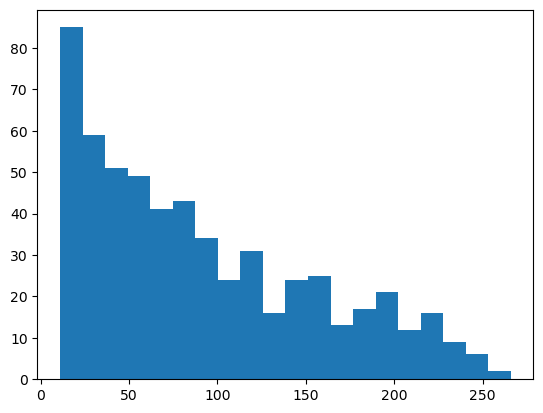

In [19]:
# wie sieht es noch aus, wenn wir die Spieler herausnehmen, die weniger als 11 Hits hatten

sum_hits_over_10 = sum_hits[np.apply_along_axis(lambda x: x > 10, 0, sum_hits)]

print(sum_hits_over_10.shape)

plt.hist(sum_hits_over_10, bins=20)
plt.show()

In [20]:
# aber vielleicht resultieren die wenigen Hits pro Saison auch einfach an der Tatsache, dass viele Spieler,
# die gelistet wurden, gar nicht die ganze Saison spielten.
# In welcher Korrelation steht eigentlich die Anzahl Spiele, bzw. Anzahl At-Bats im Verhältnis
# zu den geschlagenen Hits?

# wir holen uns die Spalten Games und At-Bats...
games_atbats = batting_cleaned[:, :2]

# ... richten den Shape von sum_hits ...
sum_hits.shape = (857, 1)

# ... und fügen beide an der 1. Achse zusammen.
g_ab_hits = np.concatenate((games_atbats, sum_hits), axis=1)

g_ab_hits

array([[  8,   3,   1],
       [152, 566, 210],
       [ 82, 297, 128],
       ...,
       [ 99, 299,  86],
       [110, 255,  92],
       [109, 333, 118]])

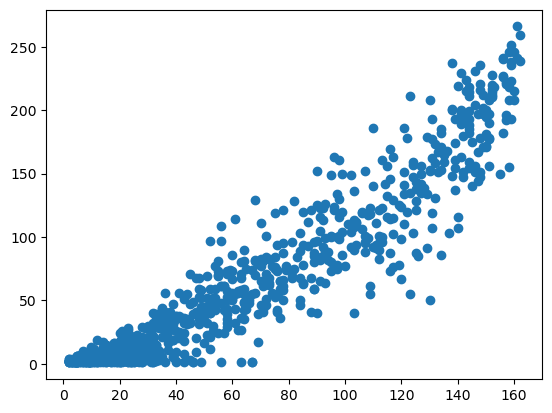

In [21]:
# Wie ist die Korrelation zwischen Games und Hits?

plt.scatter(g_ab_hits[:, 0], g_ab_hits[:, 2])
plt.show()

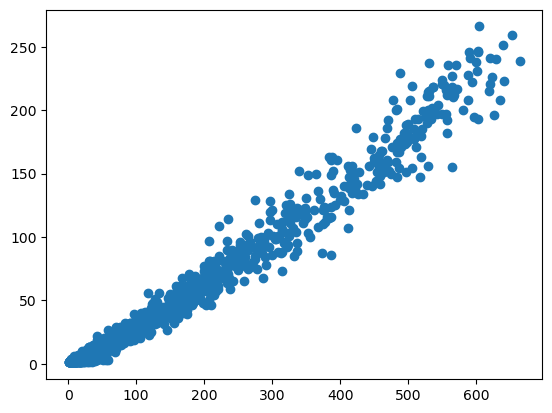

In [22]:
# Das sieht schon mal sehr eindeutig aus!
# Und wie ist dann die Korrelation zwischen At-Bats und Hits?

plt.scatter(g_ab_hits[:, 1], g_ab_hits[:, 2])
plt.show()

In [23]:
# Was ist eigentlich mean und median von Game und At-Bats pro Spieler?

print(f"Mean Games: {np.mean(g_ab_hits[:, 0])}")
print(f"Median Games: {np.median(g_ab_hits[:, 0])}\n")

print(f"Mean At-Bats: {np.mean(g_ab_hits[:, 1])}")
print(f"Median At-Bats: {np.median(g_ab_hits[:, 1])}")

Mean Games: 62.4924154025671
Median Games: 49.0

Mean At-Bats: 187.7561260210035
Median At-Bats: 127.0


In [24]:
# "Echte" Ausnahmespieler scheinen also zu den oberen 50% der Spieler in der MLB zu gehören.
# Wir brauchen also einen weiteren statistischen Wert, der besser als die reinen Anzahl an Hits ausdrückt,
# wie gut ein Spieler den Ball trifft. Dieser Wert ist traditionellerweise der sog. Batting Average oder
# einfach AVG. Also die Anzahl an Hits geteilt durch die Anzahl an At-Bats.
# Fügen wir diesen Wert als neue Spalte hinzu:

avg = np.apply_along_axis(lambda x: x[2] / x[1], 1, g_ab_hits)

avg.shape = (avg.shape[0], 1)

g_ab_hits_avg = np.concatenate((g_ab_hits, avg), axis=1, dtype="float32")

print(g_ab_hits_avg)

[[  8.           3.           1.           0.33333334]
 [152.         566.         210.           0.37102473]
 [ 82.         297.         128.           0.43097642]
 ...
 [ 99.         299.          86.           0.28762543]
 [110.         255.          92.           0.36078432]
 [109.         333.         118.           0.35435435]]


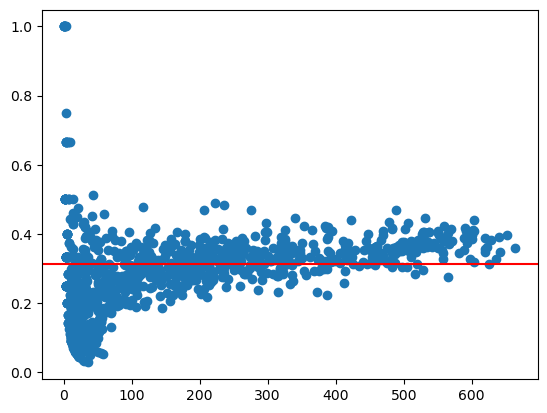

In [25]:
# wie sieht nun die Korrelation zwischen At-Bats und AVG aus?

plt.scatter(g_ab_hits_avg[:, 1], g_ab_hits_avg[:, 3])
plt.axhline(np.median(g_ab_hits_avg[:, 3]), color='r')
plt.show()

In [26]:
# Was ist der durchschnittliche AVG bei Spielern, die mehr als hundert At-Bats haben?

over_100_abs = g_ab_hits_avg[g_ab_hits_avg[:, 1] > 100]

np.mean(over_100_abs[:, 3])

0.3330699

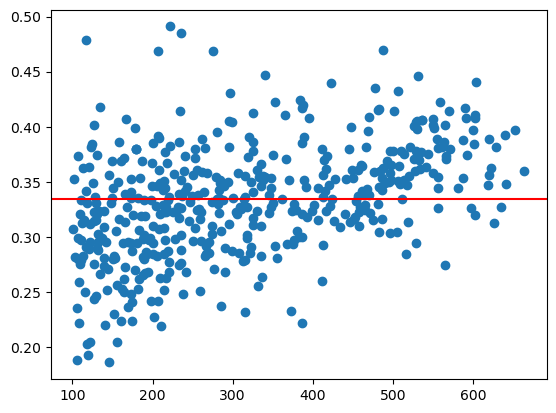

In [27]:
# das wollen wir nun noch plotten

plt.scatter(over_100_abs[:, 1], over_100_abs[:, 3])
plt.axhline(np.median(over_100_abs[:, 3]), color='r')
plt.show()

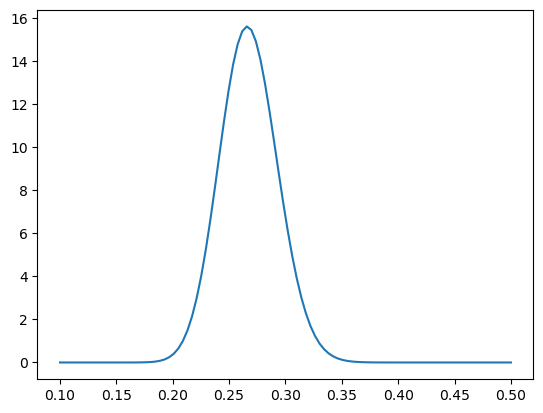

In [67]:
a, b = 80, 219
x_axis = np.linspace(0.1, 0.5, 100)

plt.plot(x_axis, stats.beta.pdf(x_axis, a, b))
plt.show()

# Pokemon

## Datasets

In [28]:
df_pokedex = pd.read_csv("data/pokedex.csv")

df_battles = pd.read_csv("data/combats.csv")

In [29]:
df_pokedex.shape

(1045, 51)

In [30]:
df_pokedex.columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [31]:
df_pokedex.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [32]:
df_battles.shape

(50000, 3)

In [33]:
df_battles.columns

Index(['First_pokemon', 'Second_pokemon', 'Winner'], dtype='object')

In [34]:
df_battles.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


## Fragen:

1. Welches Pokemon ist das schwerste?
2. Welches Pokemon hat die meisten Wins?
3. Welches Pokemon hat noch nie gewonnen?
4. Welcher Pokemon Typ hat am meisten gewonnen?
5. Hat das Pokemon mit der höchsten Attackrate auch die meisten Wins?

### Das schwerste Pokemon

In [35]:
poke_weights = df_pokedex.sort_values("weight_kg", ascending=False)[["german_name", "weight_kg", "pokedex_number"]]

In [36]:
poke_weights = poke_weights.reset_index()

In [37]:
poke_weights.head()

,index,german_name,weight_kg,pokedex_number
0,930,Kaguron,999.9,797
1,923,Cosmovum,999.9,790
2,462,Groudon,999.7,383
3,461,Groudon,950.0,383
4,1032,Endynalos,950.0,890


In [38]:
poke_weights.weight_kg.iloc[1]

999.9

In [39]:
weight = poke_weights.weight_kg.iloc[0]
name = poke_weights.german_name.iloc[0]
index = poke_weights.pokedex_number.iloc[0]

print(f"Schwerstes Pokemon mit {weight} Kg und Pokedex Nummer {index} ist: {name}")

Schwerstes Pokemon mit 999.9 Kg und Pokedex Nummer 797 ist: Kaguron


In [40]:
import requests

def get_poke_image(pokedex_num):
    url = "https://pokeapi.co/api/v2/pokemon/" + str(pokedex_num) + "/"
    response = requests.request(url=url, method="GET")
    json_stats = response.json()
    return json_stats["sprites"]["front_default"]

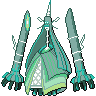

In [41]:
from IPython.display import Image

Image(get_poke_image(index))

### Die meisten Wins

In [42]:
df_battles.Winner.value_counts()

163    152
438    136
154    136
428    134
314    133
      ... 
577      5
237      4
639      4
290      3
190      3
Name: Winner, Length: 783, dtype: int64

In [43]:
winner_index = df_battles.Winner.value_counts().index[0]

winner_count = df_battles.Winner.value_counts().iloc[0]

In [44]:
winner_name = df_pokedex[df_pokedex.pokedex_number == winner_index]['german_name'].iloc[0]

print(f"Das Pokemon mit den meisten Wins ({winner_count}) ist: {winner_name}")

Das Pokemon mit den meisten Wins (152) ist: Hoothoot


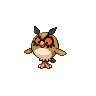

In [45]:
Image(get_poke_image(winner_index))

### Pokemons ohne Wins

In [46]:
# Array aller Nummern von Pokemons, die schon einmal gekämpft haben
all_pokemons = np.unique(df_battles.First_pokemon)

# Array aller Nummern von Pokemons, die schon einmal gewonnen haben
all_winning = np.unique(df_battles.Winner)

# Numpy Masking, ob ein Pokemon auch in dem Array mit Gewinnern ist
mask = np.isin(all_pokemons, all_winning)

# Wir wollen nur die Pokemons, bei denen die Maske False ergibt, weil das die
# sind, die noch nie gewonnen haben
loser = all_pokemons[~mask]
loser[0]

231

Dieses Pokemon hat noch nie gewonnen: Phanpy :-(


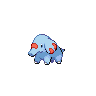

In [47]:
# Welches ist nun das Pokemon mit Nummer 231?
loser_name = df_pokedex[df_pokedex.pokedex_number == loser[0]]["german_name"].iloc[0]

print(f"Dieses Pokemon hat noch nie gewonnen: {loser_name} :-(")

Image(get_poke_image(loser[0]))

### Der Pokemon Typ, der am häufigsten gewonnen hat

In [48]:
# schauen wir uns erst einmal an, was die "type" Spalten bedeuten

df_pokedex.filter(regex="^type")

,type_number,type_1,type_2
0,2,Grass,Poison
1,2,Grass,Poison
2,2,Grass,Poison
3,2,Grass,Poison
4,1,Fire,NaN
...,...,...,...
1040,1,Ice,NaN
1041,1,Ghost,NaN
1042,2,Psychic,Grass
1043,2,Psychic,Ice


In [49]:
# sind alle type_1 vollständig?

sum(df_pokedex.type_1.isna())

0

In [50]:
# gut, wenn alle vollständig sind, dann schreiben wir nun eine kleine Funktion,
# die eine Pokedex Nummer entgegen nimmt und hierfür den type_1 ausgibt

def get_type_1_by_pokedexNum(number, df):
    return df[df["pokedex_number"] == number]["type_1"].iloc[0]

get_type_1_by_pokedexNum(438, df_pokedex) # Test

'Rock'

In [51]:
list_of_types = []

for winner in np.array(df_battles.Winner):
    list_of_types.append(get_type_1_by_pokedexNum(winner, df_pokedex))
    
types = pd.Series(list_of_types)

In [52]:
types.value_counts()

Water       7321
Normal      6877
Bug         4656
Grass       4434
Rock        3130
Fire        3067
Psychic     3054
Electric    2369
Poison      2146
Dark        1939
Ground      1869
Dragon      1824
Ghost       1804
Fighting    1688
Ice         1325
Steel       1271
Fairy       1000
Flying       226
dtype: int64

### Korrelation zwischen Attackrate und Anzahl Wins

In [53]:
df_pokedex[["attack", "speed"]]

,attack,speed
0,49,45
1,62,60
2,82,80
3,100,80
4,52,65
...,...,...
1040,145,30
1041,65,130
1042,80,80
1043,165,50


In [54]:
# wir definieren die Attack Rate als den Quotienten aus Speed Wert und Attacke Wert

df_pokedex["attack_rate"] = df_pokedex.speed / df_pokedex.attack

df_pokedex["attack_rate"]

0       0.918367
1       0.967742
2       0.975610
3       0.800000
4       1.250000
          ...   
1040    0.206897
1041    2.000000
1042    1.000000
1043    0.303030
1044    1.764706
Name: attack_rate, Length: 1045, dtype: float64

In [55]:
won_battles = df_battles.Winner.value_counts()

def get_won_battles(df_row):
    pokedex_num = df_row.pokedex_number
    if np.isin(pokedex_num, all_winning) == True:
        return won_battles[won_battles.index == pokedex_num].iloc[0]
    return 0

In [56]:
get_won_battles(df_pokedex.iloc[10]) # test

119

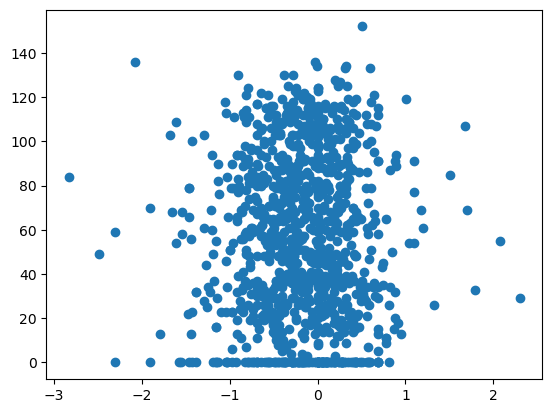

In [57]:
# attack rate

df_pokedex["won_battles"] = df_pokedex.apply(get_won_battles, axis=1)

plt.scatter(np.log(df_pokedex.attack_rate), df_pokedex.won_battles)
plt.show()

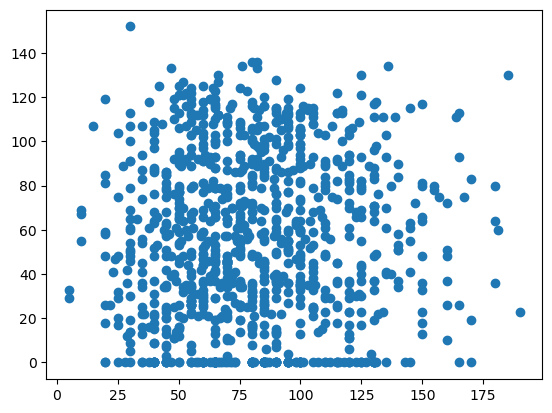

In [58]:
# Attacke Wert an sich

plt.scatter(df_pokedex.attack, df_pokedex.won_battles)
plt.show()

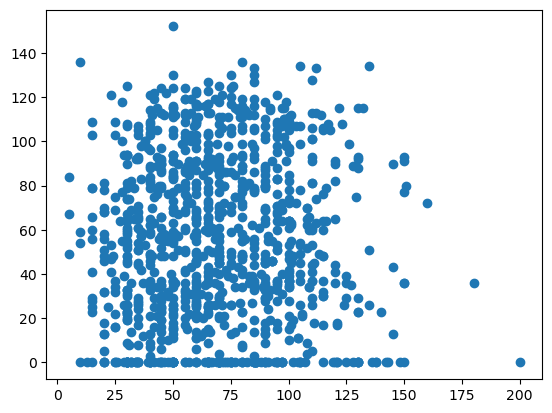

In [59]:
# und wie sieht es mit der Geschwindigkeit aus?

plt.scatter(df_pokedex.speed, df_pokedex.won_battles)
plt.show()

### Welcher Wert hat überhaupt Einfluss darauf, wie oft ein Pokemon gewonnen hat?

In [60]:
# gibt es also irgendeine Variable, die Einfluss darauf hat, wie oft ein Pokemon gewinnt?

df_pokedex.status = df_pokedex['status'].astype('category')

[]

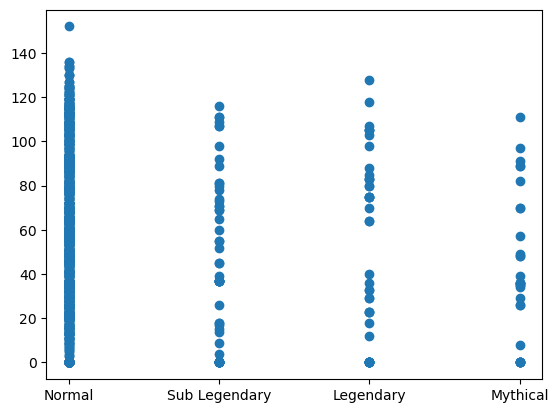

In [61]:
plt.scatter(df_pokedex.status, df_pokedex.won_battles)
plt.plot()

In [62]:
df_pokedex.sort_values("height_m")[["pokedex_number", "name", "height_m", "weight_kg"]]

,pokedex_number,name,height_m,weight_kg
923,790,Cosmoem,0.1,999.9
699,595,Joltik,0.1,0.6
991,854,Sinistea,0.1,0.2
782,669,Flabébé,0.1,0.1
896,764,Comfey,0.1,0.3
...,...,...,...,...
464,384,Mega Rayquaza,10.8,392.0
135,103,Alolan Exeggutor,10.9,415.6
386,321,Wailord,14.5,398.0
1032,890,Eternatus,20.0,950.0
